# Ejercicio 11

En este ejercicio vamos a aplicar PCA y LDA a unos datos sintéticos en los que conocemos la población de partida.

In [11]:
# Load required library: MASS
library(MASS)

## 1 Preparación de los datos
Genera una base de datos sintética formada por dos muestras normales bidimensionales de 100 elementos (usa la función `rmvnorm`, de `library(mvtnorm)`) con la misma matriz de covarianza y distinta media. Crea una variable de tipo factor que permita distinguir a qué clase pertenece cada dato y une las dos muestras en un mismo data frame (`rbind`). Visualiza estos datos en un diagrama de dispersión.

In [12]:
library("mvtnorm")

In [13]:
my_dist <- function(N, mu_x, mu_y, var_x, var_y, cov_xy){
    
    #
    # Bivariate normal distibution
    # X-axis: normally distributed (mean = mu_x, sd = sqrt(var_x));
    #         associated with class 0.
    # Y-axis: normally distributed (mean = mu_y, sd = sqrt(var_y))
    #         associated with class 1.
    #
    # @description Bivariate normal distribution.
    # X-axis: normally distributed (mean = mu_x, sd = sqrt(var_x));
    #         associated with class 0.
    # Y-axis: normally distributed (mean = mu_y, sd = sqrt(var_y))
    #         associated with class 1.
    #
    # @param N: int > 0.   Sample size.
    # @param mu_x:  float. Population mean for x-axis.
    # @param mu_y:  float. Population mean for y-axis.
    # @param var_x: float. Population variance for x-axis.
    # @param var_y. float. Population variance for y-axis.
    #
    # @return : Nx2 numeric array. If N = 1 a vector of the 
    # same length as mu, otherwise an N by length(mu) matrix 
    # with one sample in each row.
    # 
    
    return(mvrnorm(N, 
                    mu = c(mu_x, mu_y),
                    Sigma = matrix(c(var_x, cov_xy, cov_xy, var_y), nrow = 2)))
}

In [14]:
# Create sample x_1: 
x_1 <- my_dist(N = 100, mu_x = 2, mu_y = 4, var_x = 1, var_y = 1, cov_xy = 0.3)

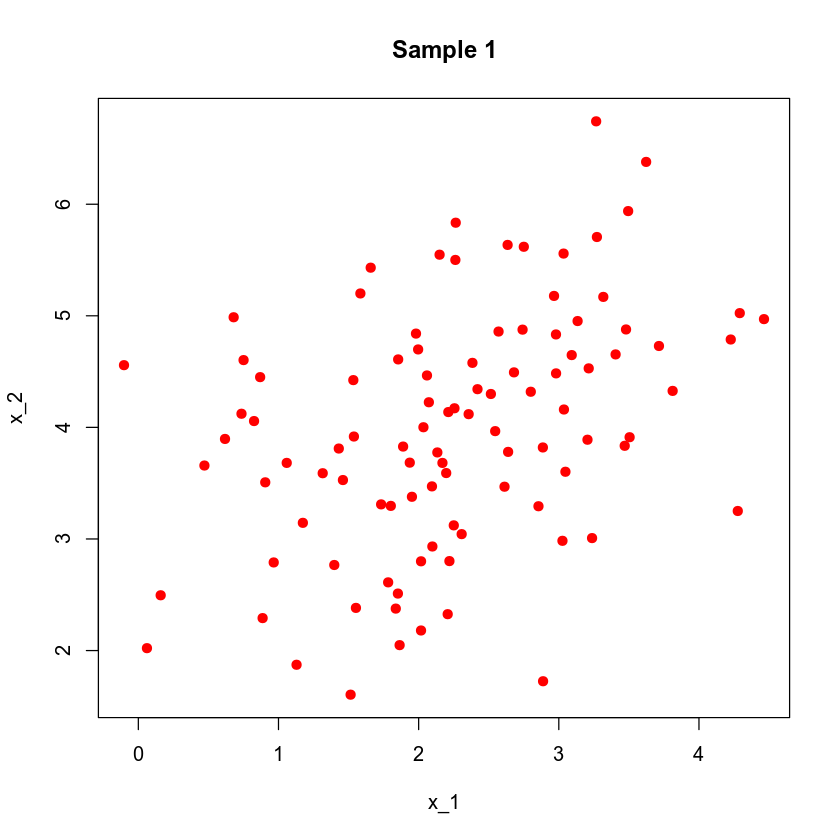

In [15]:
# Plot sample
plot(x_1, pch = 19, col  ='red', xlab = "x_1", ylab = "x_2", main = "Sample 1")

In [16]:
# Create y_1 matrix: 
# nrow(y_matrix) = nrow(x_1)
# Associated with class 0
y_1 <- as.matrix(rep(0, nrow(x_1)))

In [17]:
# Create sample x_2
x_2 <- my_dist(N = 100, mu_x = 6, mu_y = 3, var_x = 1, var_y = 1, cov_xy = 0.3)

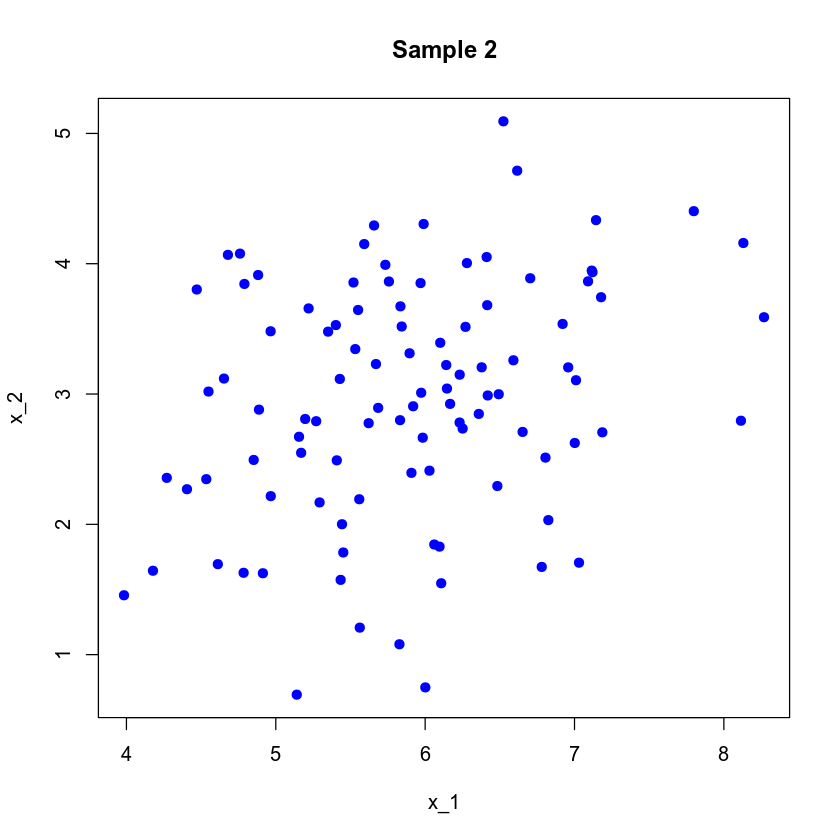

In [18]:
# Plot sample
plot(x_2, pch = 19, col = 'blue', xlab = "x_1", ylab = "x_2", main = "Sample 2")

In [19]:
# Create y_2 matrix: 
# nrow(y_2) = nrow(x_2)
# Associated with class 1
y_2 <- as.matrix(rep(1, nrow(x_2)))

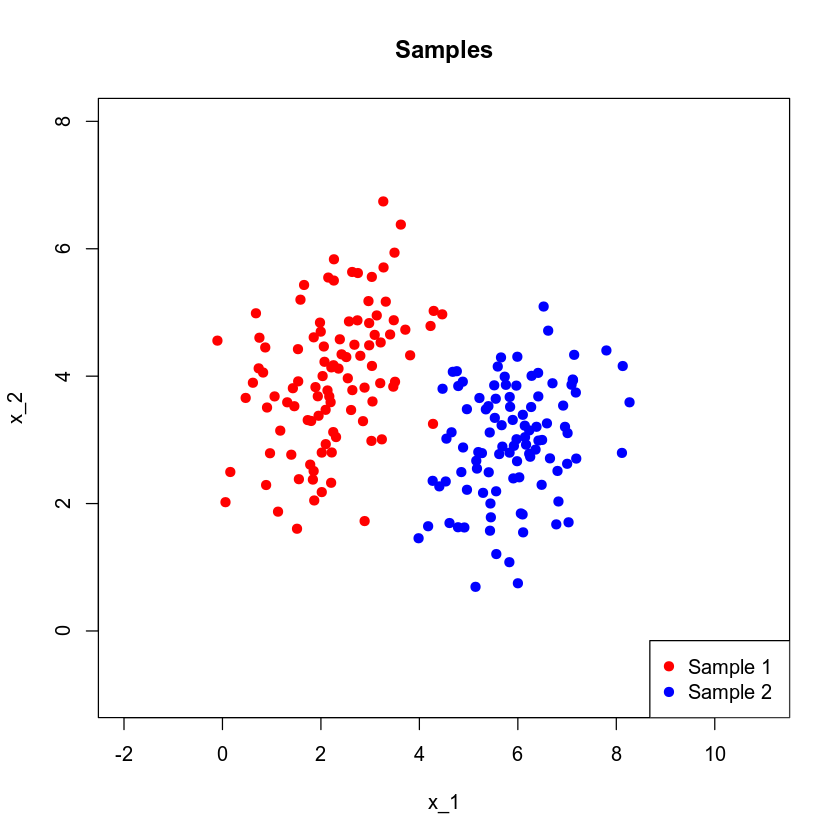

In [21]:
plot(x_1, pch = 19, col = 'red', 
     xlim = c(-2,11), ylim = c(-1, 8),
     xlab = "x_1", ylab = "x_2",
     main = "Samples") # Plot sample 1

points(x_2, pch = 19, col = 'blue') # Plot sample 2

legend("bottomright", pch = c(19,19), lty = c(0,0),
       c("Sample 1", "Sample 2"), col = c("red", "blue"))

In [22]:
# Combine x_1, x_2. Row binding.
# x_train: sample for training our model
x_train <- rbind(x_1, x_2)

In [23]:
# Combine y_1, y_2. Row binding.
# y_train: observed classes for training
y_train <- rbind(y_1, y_2)

## 2 Aplicación de PCA
2.1 Aplica un PCA a estos datos y representa el resultado (`plot`). Los PCs representan las proyecciones en este nuevo espacio dado por las EOFs. 

2.2 Representa esas nuevas direcciones en un diagrama de dispersión junto con los datos originales (puedes usar `arrows` para indicar las direcciones). 

2.3 Calcula la proyección de los datos originales sobre la primera nueva dirección, EOF1, ($X \approx \bar{X} + Z_{1}P_{1}^{t}$) y añade al gráfico de dispersión el segmento que une cada dato original con su proyección (`segments`).

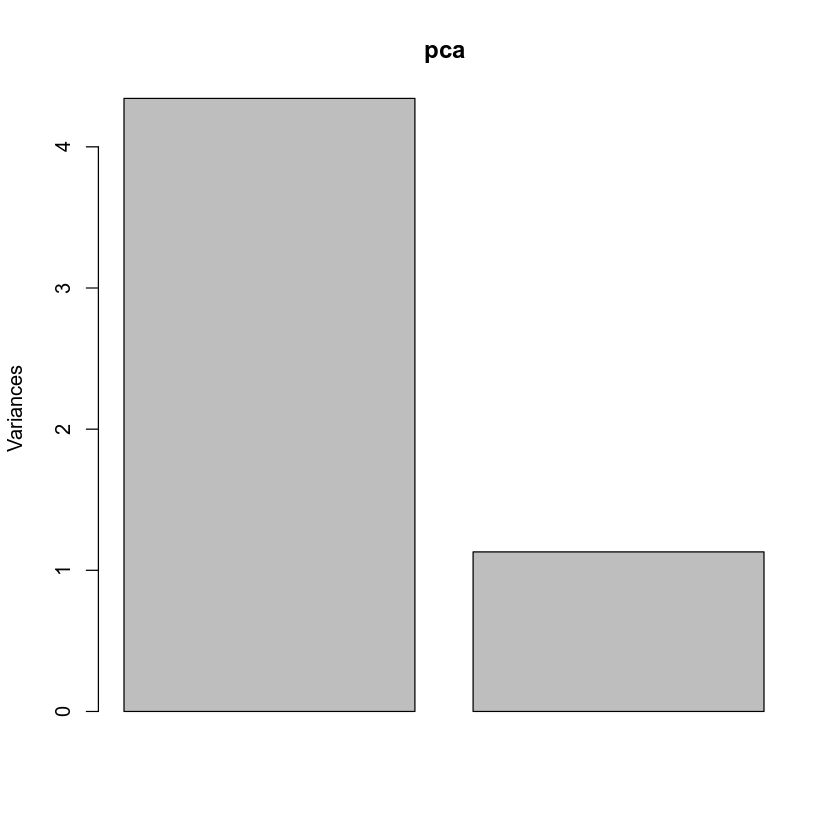

In [26]:
pca <- prcomp(x_train)
plot(pca)
#El método plot devuelve un gráfico de las varianzas (eje Y)
# asociada con cada PC (eje X).
# Este gráfico es útil para decidir cuántas PCs 
# retener para análisis posteriores. De forma alternativa,
# puede utilizarse la función screeplot con el mismo fin.

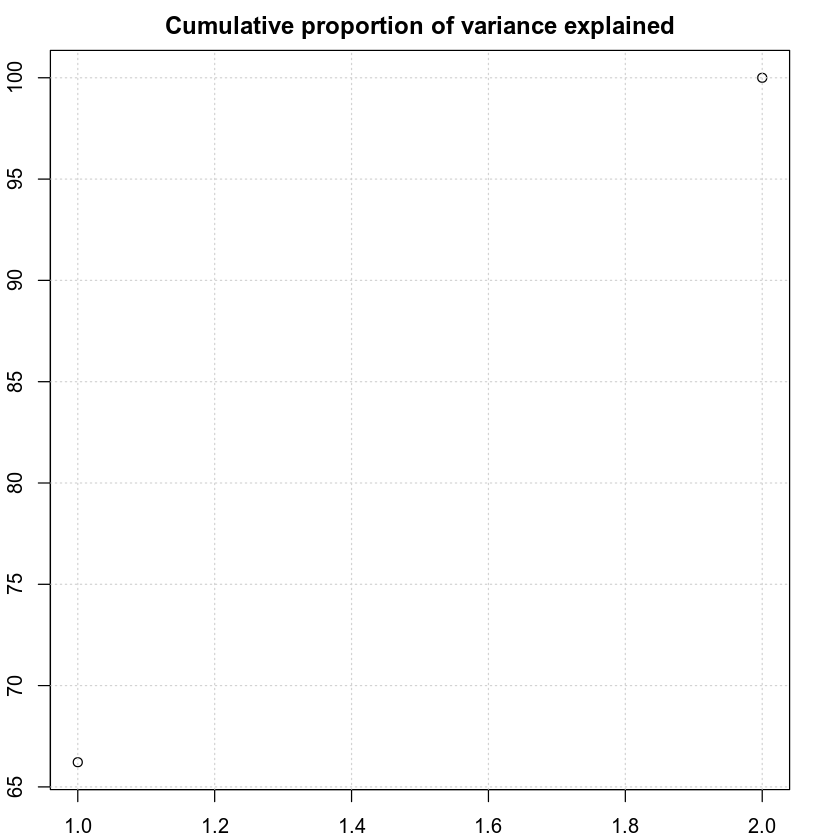

In [29]:
par(mfrow=c(1,1), mar=c(2.1,2.1,2.1,2.1))
plot(cumsum(pca$sdev)/sum(pca$sdev)*100,main="Cumulative proportion of variance explained")
grid()

In [27]:
print(pca)

Standard deviations (1, .., p=2):
[1] 2.084029 1.063191

Rotation (n x k) = (2 x 2):
            PC1        PC2
[1,]  0.9808406 -0.1948118
[2,] -0.1948118 -0.9808406


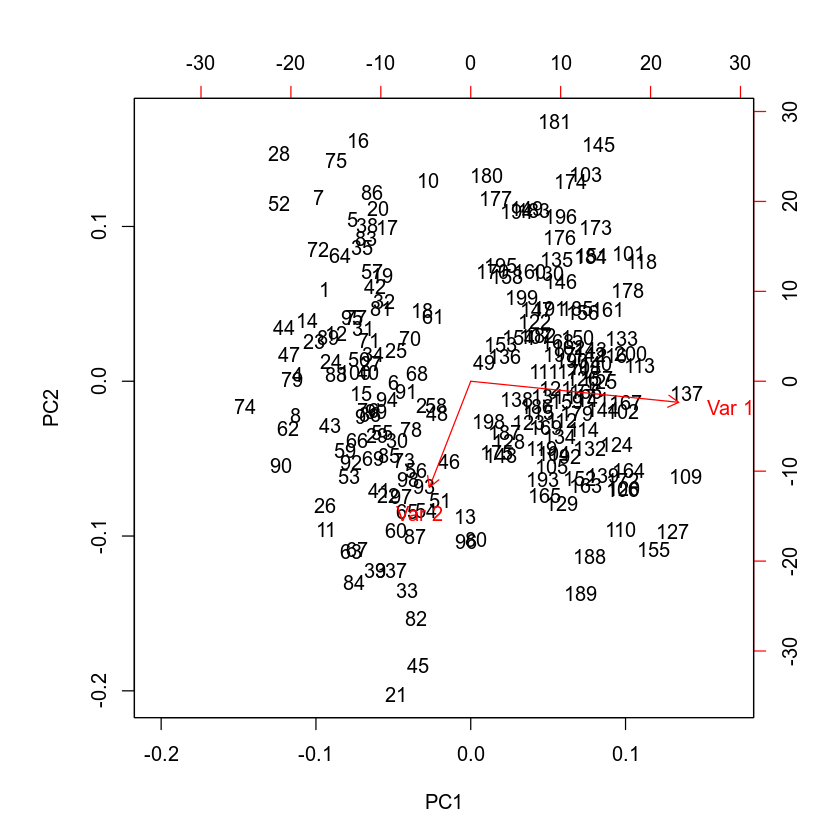

In [85]:
biplot(pca)

In [39]:
projected <- predict(pca, newdata = x_train)[,1]

In [40]:
# SAME AS
#trainPC <- pca$x[,1]
#trainPC

In [153]:
xrecovery = pca$x[,1] %*% t(pca$rotation[,1]) + pca$center[1]

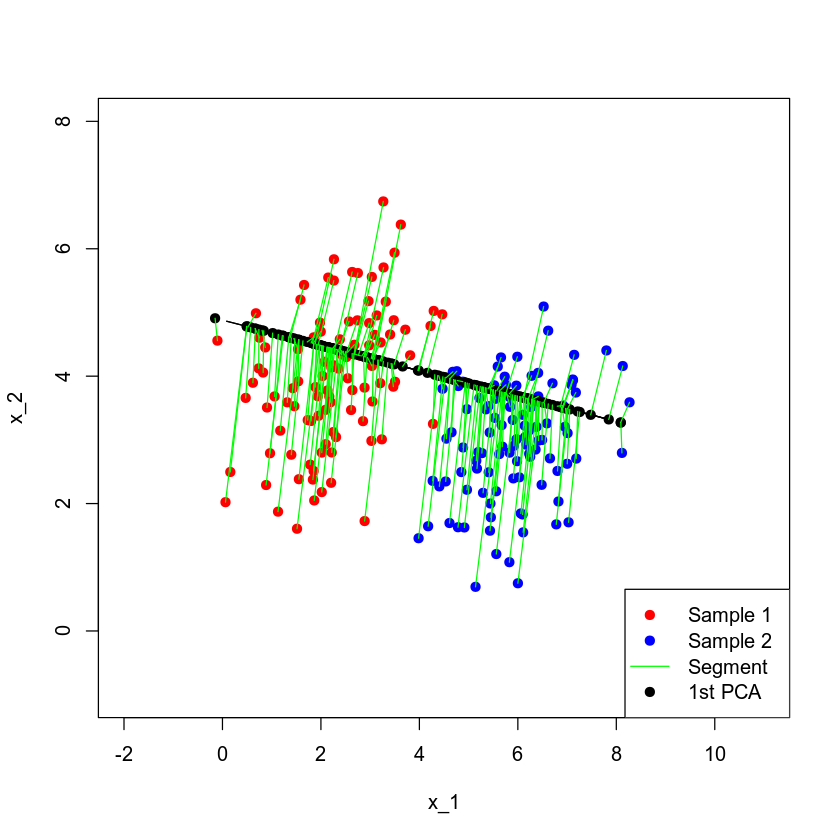

In [154]:
plot(x_1, pch = 19, col = 'red', 
     xlim = c(-2,11), ylim = c(-1, 8),
     xlab = "x_1", ylab = "x_2") # Plot sample 1

points(x_2, pch = 19, col = 'blue') # Plot sample 2

points(xrecovery, type = "b", pch = 19)

segments(x0 = x_train[,1], x1 = xrecovery[,1],
         y  = x_train[,2], y1 = xrecovery[,2], col = 'green')

legend("bottomright", pch = c(19,19, NA, 19), lty = c(0,0, 1, 0),
       c("Sample 1", "Sample 2", "Segment", "1st PCA"), col = c("red", "blue", "green", "black"))

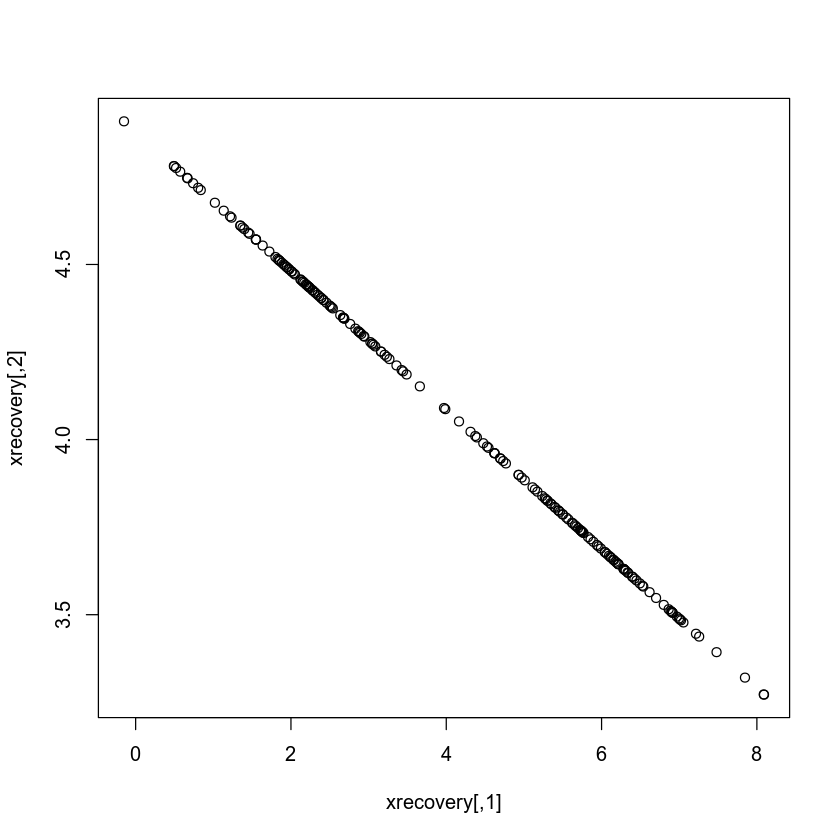

## 3 Aplicación de LDA
3.1 Utiliza la información de las clases para aplicar un LDA a estos datos y representa el resultado (`plot`).

3.2 Representa un diagrama de dispersión con los datos originales y añade los centroides de las dos clases y la nueva dirección. Ver la ayuda de `?lda` para identificar esos parámetros en la salida de la función.